<a href="https://colab.research.google.com/github/gaudhami4/task1/blob/main/Copy_of_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import itertools as it
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model ,pipeline, preprocessing
%matplotlib inline
import pylab as pl

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
df = pd.read_csv("car_data.csv")
df.head(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
x=df[["Mileage"]]
y=df[["Price"]]

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [ ]:
print("y=",reg.coef_," * x + ",reg.intercept_)

y= [[-0.1725205]]  * x +  [24764.55900606]


In [ ]:
print("R^2 SCORE-->: ",reg.score(x,y))
print("R2 is not greater than 0.8 so need to look other option")

R^2 SCORE-->:  0.02046344732348926
R2 is not greater than 0.8 so need to look other option


Text(0.5, 1.0, 'MIleage vs Price')

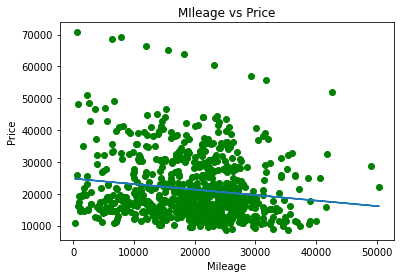

In [ ]:
plt.scatter(x,y,color="g")
plt.plot(x,reg.predict(x))
plt.xlabel('Mileage')
plt.ylabel("Price")
plt.title("MIleage vs Price")

# **TASK 2**

In [ ]:
features=["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]
price=["Price"]
X=df[features]
Y=df[price]
reg=LinearRegression()
regT2=reg.fit(X,Y)

In [ ]:
print("R^2 BASED ON MILEAGE,CYLINDER..ETC",reg.score(X,Y))
print("0.44 is not a strong correlation")

R^2 BASED ON MILEAGE,CYLINDER..ETC 0.4462643536728379
0.44 is not a strong correlation


# **TASK 3**

In [ ]:
dummies=pd.get_dummies(df,columns=["Make","Model","Type"])

In [ ]:
columns=["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]
X=dummies[columns]
Y=dummies['Price']
regr=LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [ ]:
print("INTERCEPT",regr.intercept_)
print("Coefficient",regr.coef_)
print("Score ",regr.score(X,Y))

INTERCEPT 6758.755143598106
Coefficient [-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
  6.28899715e+03 -1.99379528e+03  3.34936162e+03]
Score  0.4462643536728379


# **COMBINATION OF FACTOR**

In [ ]:
#BEST COMBINATIONS
d=[]
for i in range(1,8):
  d.append(it.combinations(features,i))

In [ ]:
Y=pd.DataFrame(Y)
index=Y.index
Y["index"]=index
Y.shape

(804, 2)

In [ ]:
x.shape

(804, 2)

In [ ]:
score=0
for d1 in d:
  for x1 in d1:
    x1=list(x1)
    x=df[x1]
    degrees=8
    for degree in range(degrees):
      model=pipeline.Pipeline([
          ("poly",preprocessing.PolynomialFeatures(degree=degree)),
          ("linear", linear_model.LinearRegression(fit_intercept=False))])
      model=model.fit(x,Y)
      model_score=model.score(x,Y)
    if score<model.score(x,Y):
      score=model.score(x,Y)
      maxgroup=x1
      best_degree=degree
print(degree,maxgroup,score)


ValueError: ignored